In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#define derivative function
def f(r,t):
    #unpack arrays
    x1=r[0]
    vx1=r[1]
    y1=r[2]
    vy1=r[3]
    z1=r[4]
    vz1=r[5]
    
    x2=r[6]
    vx2=r[7]
    y2=r[8]
    vy2=r[9]
    z2=r[10]
    vz2=r[11]
    
    x3=r[12]
    vx3=r[13]
    y3=r[14]
    vy3=r[15]
    z3=r[16]
    vz3=r[17]
    
    #find distances between objects
    d12 = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
    d13 = np.sqrt((x1-x3)**2+(y1-y3)**2+(z1-z3)**2)
    d23 = np.sqrt((x2-x3)**2+(y2-y3)**2+(z2-z3)**2)
    
    # assign derivatives
    fx1=vx1
    fvx1 = -G*M2*(x1-x2)/d12**3-G*M3*(x1-x3)/d13**3
    
    fx2=vx2
    fvx2 = -G*M3*(x2-x3)/d23**3-G*M1*(x2-x1)/d12**3
    
    fx3=vx3
    fvx3 = -G*M1*(x3-x1)/d13**3-G*M2*(x3-x2)/d23**3
    
    fy1=vy1
    fvy1 = -G*M2*(y1-y2)/d12**3-G*M3*(y1-y3)/d13**3
    
    fy2=vy2
    fvy2 = -G*M3*(y2-y3)/d23**3-G*M1*(y2-y1)/d12**3
    
    fy3=vy3
    fvy3 = -G*M1*(y3-y1)/d13**3-G*M2*(y3-y2)/d23**3
    
    fz1=vz1
    fvz1 = -G*M2*(z1-z2)/d12**3-G*M3*(z1-z3)/d13**3
    
    fz2=vz2
    fvz2 = -G*M3*(z2-z3)/d23**3-G*M1*(z2-z1)/d12**3
    
    fz3=vz3
    fvz3 = -G*M1*(z3-z1)/d13**3-G*M2*(z3-z2)/d23**3

    return np.array([fx1,fvx1,fy1,fvy1,fz1,fvz1,fx2,fvx2,fy2,fvy2,fz2,fvz2,fx3,fvx3,fy3,fvy3,fz3,fvz3])

# Define RK4 algorithm with error estimate
def RK4_adaptive(f, r1, t1, t2, dt=0.1, err_tol=3.171e-5):

    # Define initial condition
    r = r1.copy()

    # define a function for RK4 update
    def rk4_update(r, t, dt):
        # update value using RK4
        k1 = dt * f(r, t)
        k2 = dt * f(r+0.5*k1, t+0.5*dt)
        k3 = dt * f(r+0.5*k2, t+0.5*dt)
        k4 = dt * f(r+k3, t+dt)
        return r + (k1 + 2*k2 + 2*k3 + k4)/6.0
        
    # Iterate RK4 Method
    t = t1
    x1points = []
    y1points = []
    z1points = []
    
    x2points = []
    y2points = []
    z2points = []
    
    x3points = []
    y3points = []
    z3points = []
    
    tpoints = []
    while t <= t2:
        #print(t)
        
        # append value of x to xpoints
        x1points.append(r[0])
        y1points.append(r[2])
        z1points.append(r[4])
        
        x2points.append(r[6])
        y2points.append(r[8])
        z2points.append(r[10])
        
        x3points.append(r[12])
        y3points.append(r[14])
        z3points.append(r[16])
        
        tpoints.append(t)

        # Enter error tolerance loop
        while True:
            ## Calculate estimated error ##
            # double step
            r1_a = rk4_update(r, t, dt).copy()
            r1 = rk4_update(r1_a, t+dt, dt).copy()
            # big step
            r2 = rk4_update(r, t, 2*dt).copy()

            # calculate total error
            eps1_x = np.abs(r1[0] - r2[0])/30.0
            eps1_y = np.abs(r1[2] - r2[2])/30.0
            eps1_z = np.abs(r1[4] - r2[4])/30.0
            eps1_tot = np.sqrt(eps1_x**2 + eps1_y**2 + eps1_z**2)
            
            eps2_x = np.abs(r1[6] - r2[6])/30.0
            eps2_y = np.abs(r1[8] - r2[8])/30.0
            eps2_z = np.abs(r1[10] - r2[10])/30.0
            eps2_tot = np.sqrt(eps2_x**2 + eps2_y**2 + eps2_z**2)
            
            eps3_x = np.abs(r1[12] - r2[12])/30.0
            eps3_y = np.abs(r1[14] - r2[14])/30.0
            eps3_z = np.abs(r1[16] - r2[16])/30.0
            eps3_tot = np.sqrt(eps3_x**2 + eps3_y**2 + eps3_z**2)
            
            if eps3_tot >= eps2_tot and eps3_tot > eps1_tot:
                eps_tot = eps3_tot
                
            elif eps2_tot >= eps1_tot and eps2_tot > eps3_tot:
                eps_tot = eps2_tot
                
            else:
                eps_tot = eps1_tot
                
            # calculate rho
            if eps_tot == 0:
                rho = 1.0
            else:
                rho = (dt*err_tol/eps_tot)**(1./4)
            
            # evaluate ideal step size
            if rho >= 1.0:
                if rho >= 2.0:
                    rho = 2.0
                break
            else:
                if rho < 0.5:
                    rho = 0.5
                dt *= 0.99*rho
                
        # update dt
        dt *= 0.99*rho
        
        # update r to the single step
        r = r1_a.copy()
        
        # update t
        t += dt
        
    x1points = np.array(x1points)
    y1points = np.array(y1points)
    z1points = np.array(z1points)
    
    x2points = np.array(x2points)
    y2points = np.array(y2points)
    z2points = np.array(z2points)
    
    x3points = np.array(x3points)
    y3points = np.array(y3points)
    z3points = np.array(z3points)
    
    tpoints = np.array(tpoints)
    
    return tpoints, x1points, y1points, z1points, x2points, y2points, z2points, x3points, y3points, z3points



if __name__ == "__main__":

    # initial conditions
    G = 6.67e-11
    M1 = 1.989e30
    M2 = 5.972e24
    M3 = 7.34767309e22
    r1 = np.array([0,0,0,0,0,0,149.6e9,0,0,3.0e4,0,0,(384.4e6+149.6e9),0,0,3.1e4,0,0], dtype=np.float)
    print(r1)

    # run solver
    tpoints, x1points, y1points, z1points, x2points, y2points, z2points, x3points, y3points, z3points = RK4_adaptive(f, r1, 0, 6.307e7, dt=1.0e4, err_tol=30.171e-5)

[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 1.496000e+11 0.000000e+00 0.000000e+00 3.000000e+04
 0.000000e+00 0.000000e+00 1.499844e+11 0.000000e+00 0.000000e+00
 3.100000e+04 0.000000e+00 0.000000e+00]


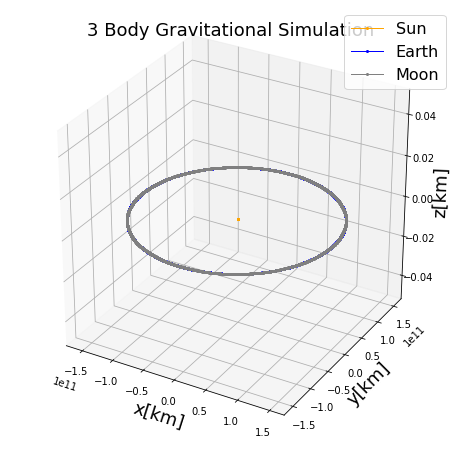

In [4]:
# plot
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')
Sun = ax.plot(x1points, y1points, z1points, marker='o', markersize = 2, linewidth = 1, color = 'orange')
Earth = ax.plot(x2points, y2points, z2points, marker='o', markersize = 2, linewidth = 1, color = 'blue')
Moon = ax.plot(x3points, y3points, z3points, marker='o', markersize = 2, linewidth = 1, color = 'gray')


ax.legend([Sun[0], Earth[0], Moon[0]], ['Sun', 'Earth', 'Moon'], fontsize=16)

ax.set_title('3 Body Gravitational Simulation', fontsize=18)
ax.set_xlabel('x[km]', fontsize=18)
ax.set_ylabel('y[km]', fontsize=18)
ax.set_zlabel('z[km]', fontsize=18)

plt.show()